**Convolutional Neural Network (CNN) for Image Classification**

Packages for dealing with images:
1. [OpenCV](https://pypi.org/project/opencv-python/)
2. [Matplotlib](https://matplotlib.org/)
3. [Pillow](https://pillow.readthedocs.io/en/stable/)
3. [scikit-image](https://scikit-image.org/)
4. [Tensorflow](https://www.tensorflow.org/)

In [33]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import tempfile
from urllib.request import urlopen
from io import BytesIO
from PIL import Image, ImageOps
import tensorflow_hub as hub
import time
from PIL import ImageColor, ImageFont, ImageDraw

## Load images

Anzahl der Unterverzeichnisse: 5
Shape of images array: (250, 384, 512, 3)


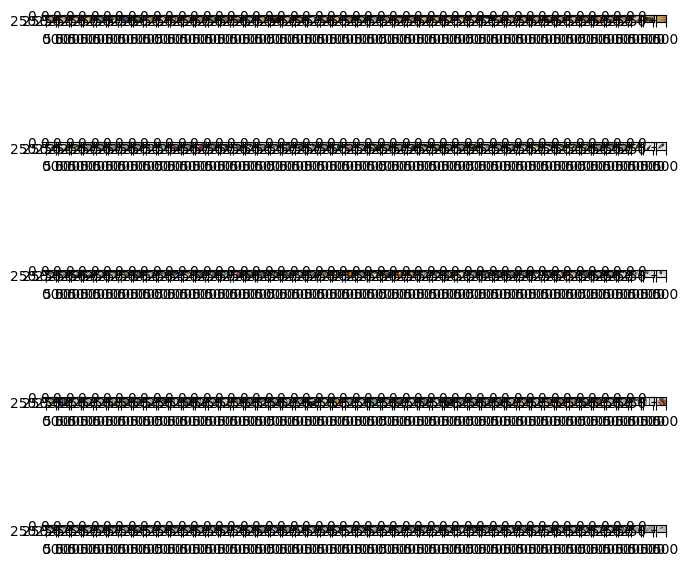

In [2]:
def get_filenames(filepath):
    # Lade alle .jpg-Dateien rekursiv aus dem Verzeichnis und seinen Unterordnern
    imagefiles = [f for f in glob.glob(filepath + '/**/*.jpg', recursive=True)]  # '**/' für rekursive Suche
    return imagefiles 

def read_images(filenames, height=None, width=None):
    images = [Image.open(filename) for filename in filenames]
    if (not height is None) and (not width is None):
        images = [img.resize((width, height)) for img in images]
    return images

def images_to_array(images):
    return np.asarray([np.asarray(img) for img in images])

path = r'C:\Users\Thore\Desktop\KI\ki\Garbage classification'
num_dirs = sum(os.path.isdir(os.path.join(path, i)) for i in os.listdir(path))
print(f"Anzahl der Unterverzeichnisse: {num_dirs}")

# Get file names
image_names = get_filenames(path)

# Load images
input_shape = {
    "height": 384,
    "width": 512,
    "channels": 3
}
images = read_images(image_names, height=input_shape["height"], width=input_shape["width"])

# Convert images to array
aimages = images_to_array(images)
print(f'Shape of images array: {aimages.shape}')

# Plot images array
#display(Image.fromarray(aimages[11]))
fig = plt.figure(figsize=(8, 8))
rows, columns = num_dirs, 50
for i in range(aimages.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aimages[i, ...])
plt.show()

## Create Labels

In [5]:
# Label list
def flatten_lst(lst):
    return [item for items in lst for item in items]

# def get_folder_names(filepath):
#     # Holen der Namen aller Ordner im angegebenen Verzeichnis
#     folder_names = [folder for folder in os.listdir(filepath) if os.path.isdir(os.path.join(filepath, folder))]
#     return folder_names

# folder_names = get_folder_names(filepath)

categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic']
labels = flatten_lst([[label] * 50 for label in categories])
print(labels)
# One-hot encoding of the labels
encoder = OneHotEncoder(categories=[categories], sparse_output=False)
y = encoder.fit_transform(np.array(labels).reshape(-1,1))
y

['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass', 'glass'

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

## Build model

In [7]:
# Hyperparameters
epochs = 1
batch_size = 32

# CNN model
inputs = Input(shape=(input_shape.values()))
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(inputs)
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Flatten()(hidden)
hidden = Dense(units=256, activation='relu')(hidden)
hidden = Dropout(rate=0.25)(hidden)
output = Dense(units=y.shape[-1], activation='softmax')(hidden)
cnn = Model(inputs=inputs, outputs=output, name='CNN_CBP_Class')

# Configuration of the training process
cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Fit model
history = cnn.fit(x=aimages, y=y, epochs=epochs, batch_size=1)

250/250 [==============================] - 493s 2s/step - loss: 772.1577 - accuracy: 0.1680


## Plot model learning curve

C:\Users\Thore\AppData\Local\Temp\ipykernel_15728\3926582565.py:3: RuntimeWarning: invalid value encountered in divide
  a = (a - a.min()) / (a.max() - a.min())


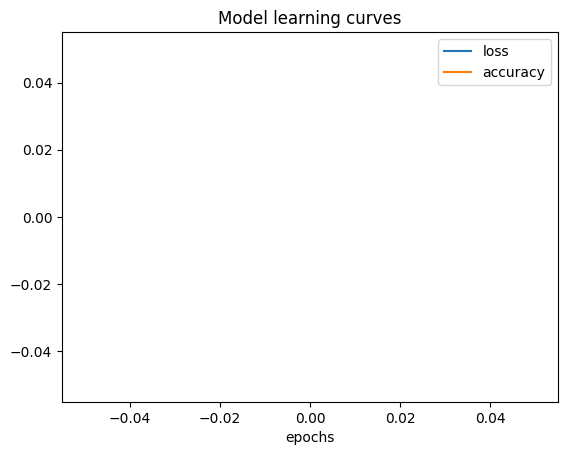

In [8]:
def minmax(a):
    a = np.asarray(a)
    a = (a - a.min()) / (a.max() - a.min())
    return a

plt.plot(range(1, epochs+1), minmax(history.history['loss']))
plt.plot(range(1, epochs+1), minmax(history.history['accuracy']))
plt.title('Model learning curves')
plt.xlabel('epochs')
plt.gca().legend(('loss', 'accuracy'))
plt.show()

## Predictions

In [9]:
# Metric functions
def accuracy(actuals, preds):
    actuals, preds = np.asarray(actuals), np.asarray(preds)
    return np.mean(np.ravel(actuals) == np.ravel(preds))

In [10]:
yhat = cnn.predict(aimages)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]

print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

8/8 [==============================] - 17s 2s/step
Accuracy: 20.0%


## Transfer Learning

Transfer learning is the reuse of an pre-trained neural network for similar, related tasks. An overview of pre-trained convolutional neural networks in Tensorflow can be found on https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [12]:
from tensorflow.keras.applications import VGG16

# Images should be in specified input shape for pre-trained model
pt_input_shape = {'height': 224, 'width': 224, 'channels': 3}
pt_images = images_to_array(read_images(image_names, height=pt_input_shape['height'], width=pt_input_shape['width']))

# Load pre-configured and pre-trained CNN without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=tuple(pt_input_shape.values()))
# Mark loaded layers as not trainable (freeze layers)
for layer in base_model.layers:
    layer.trainable = False

# Place new top layer on base model
output = Flatten()(base_model.layers[-1].output)
output = Dense(units=1024, activation='relu')(output)
output = Dense(units=y.shape[-1], activation='softmax')(output)

# Define the entire new model
pt_cnn = Model(inputs=base_model.inputs, outputs=output)

# Train the new model
epochs = 10
batch_size = 32
pt_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
pt_history = pt_cnn.fit(x=pt_images, y=y, epochs=epochs, batch_size=batch_size)

# Predict on the model
yhat = pt_cnn.predict(pt_images)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]
print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

Epoch 1/10
8/8 [==============================] - 54s 6s/step - loss: 33.1004 - accuracy: 0.5320
Epoch 2/10
8/8 [==============================] - 48s 6s/step - loss: 4.7349 - accuracy: 0.8600
Epoch 3/10
8/8 [==============================] - 52s 7s/step - loss: 3.1525 - accuracy: 0.9680
Epoch 4/10
8/8 [==============================] - 50s 6s/step - loss: 0.6081 - accuracy: 0.9760
Epoch 5/10
8/8 [==============================] - 48s 6s/step - loss: 0.0311 - accuracy: 0.9920
Epoch 6/10
8/8 [==============================] - 48s 6s/step - loss: 2.0179e-06 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 48s 6s/step - loss: 0.0076 - accuracy: 0.9960
Epoch 8/10
8/8 [==============================] - 48s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 47s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 46s 6s/step
Accuracy: 100.0%


In [14]:
# Alternative way
pt_cnn = tf.keras.Sequential()

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=tuple(pt_input_shape.values()), classes=y.shape[-1])
for layer in base_model.layers:
    layer.trainable = False

pt_cnn.add(base_model)
pt_cnn.add(Flatten())
pt_cnn.add(Dense(units = 1024, activation='relu'))
pt_cnn.add(Dense(units = y.shape[-1], activation='softmax'))

epochs = 5
batch_size = 32
pt_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
pt_history = pt_cnn.fit(x=pt_images, y=y, epochs=epochs, batch_size=batch_size)

# Predict on the model
yhat = pt_cnn.predict(pt_images)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]
print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

Epoch 1/5
8/8 [==============================] - 35s 4s/step - loss: 33.0252 - accuracy: 0.5360
Epoch 2/5
8/8 [==============================] - 26s 3s/step - loss: 4.6114 - accuracy: 0.8760
Epoch 3/5
8/8 [==============================] - 26s 3s/step - loss: 1.6900 - accuracy: 0.9440
Epoch 4/5
8/8 [==============================] - 27s 3s/step - loss: 0.1723 - accuracy: 0.9840
Epoch 5/5
8/8 [==============================] - 21s 2s/step
Accuracy: 99.6%


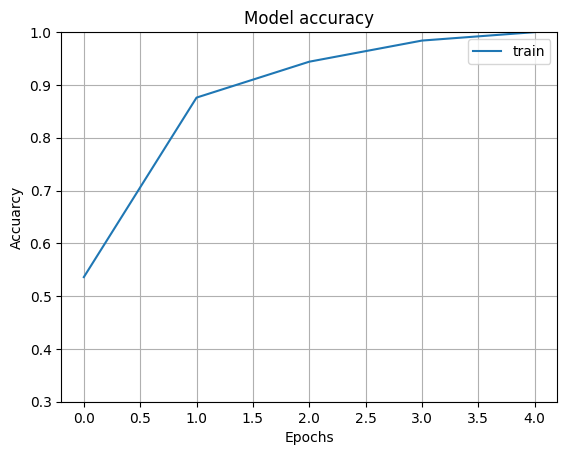

In [15]:
plt.plot(pt_history.history['accuracy'])
plt.axis(ymin=0.3, ymax = 1)
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

In [16]:
# Other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(labels, yhat)
pre = precision_score(labels, yhat, average=None)
rec = recall_score(labels, yhat, average=None)
f1 = f1_score(labels, yhat, average=None)
print(f'Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1-Score: {f1}')

Accuracy: 0.996, Precision: [1.         1.         1.         1.         0.98039216], Recall: [1.   1.   0.98 1.   1.  ], F1-Score: [1.         1.         0.98989899 1.         0.99009901]


In [21]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.LANCZOS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getbbox(ds)[3] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    bbox = font.getbbox(display_str)
    text_width, text_height = bbox[2], bbox[3]
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to C:\Users\Thore\AppData\Local\Temp\tmpfsxmg9s0.jpg.


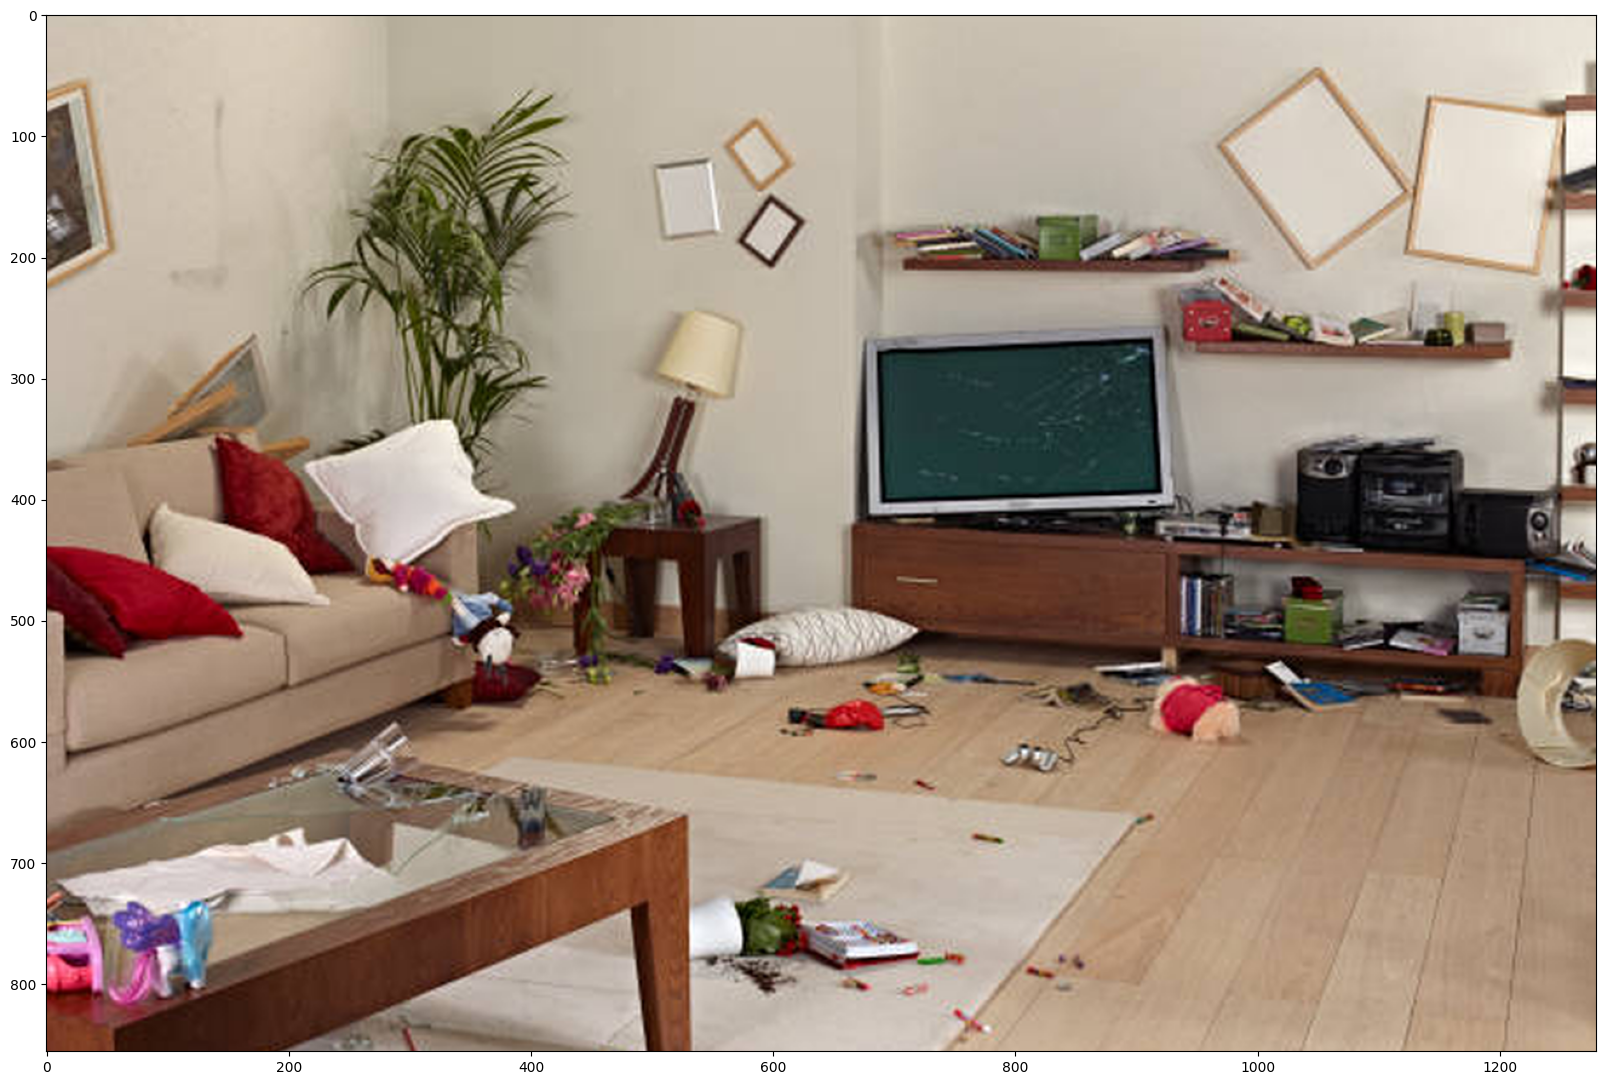

In [35]:
# By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
image_url = "https://media.istockphoto.com/id/1007757070/de/foto/unordentliche-wohnzimmer-mit-sch%C3%A4den.jpg?s=612x612&w=0&k=20&c=wFuF5zuIbfyUxbXNw0OSyhYV-y8AD0o13KQI91jcx1M=" 
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

In [36]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [37]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [38]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)


In [40]:
run_detector(detector, downloaded_image_path)

MemoryError: 